# **1. Data Preprocessing**

Our project involves analyzing trip data from the DIVVY bike sharing system for the year 2022. The dataset comprises 12 files, with each file representing the trip data for a specific month. The primary data source for this project is the official DIVVY website (https://divvybikes.com/system-data).

To ensure data accuracy and completeness, we will also utilize additional data about DIVVY stations. This supplementary data, obtained from the City of Chicago's official data portal (https://data.cityofchicago.org/Transportation/Divvy-Bicycle-Stations/bbyy-e7gq/data), will be used for cross-referencing and restoring any missing values in the trip data.

By combining the trip data from the 12 files and integrating station data, our analysis aims to gain insights into various aspects of the DIVVY bike sharing system. This includes studying user patterns, demand forecasting, station utilization, and potential improvements to enhance the overall user experience.

In [1]:
# Loading libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Connecting to google drive to import file with data:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Loading files with data from Google Drive:
path1 = "/content/drive/MyDrive/data/202201-divvy-tripdata.csv"
path2 = "/content/drive/MyDrive/data/202202-divvy-tripdata.csv"
path3 = "/content/drive/MyDrive/data/202203-divvy-tripdata.csv"
path4 = "/content/drive/MyDrive/data/202204-divvy-tripdata.csv"
path5 = "/content/drive/MyDrive/data/202205-divvy-tripdata.csv"
path6 = "/content/drive/MyDrive/data/202206-divvy-tripdata.csv"
path_st = "/content/drive/MyDrive/data/Divvy_Bicycle_Stations.csv"
data_m1 = pd.read_csv(path1) # trips in January 2022
data_m2 = pd.read_csv(path2) # trips in February 2022
data_m3 = pd.read_csv(path3) # trips in March 2022
data_m4 = pd.read_csv(path4) # trips in April 2022
data_m5 = pd.read_csv(path5) # trips in May 2022
data_m6 = pd.read_csv(path6) # trips in June 2022
data_st = pd.read_csv(path_st) # stations data


We have six files, each containing information about DIVVY trips for one month, from January 2022 to June 2022. We want to combine our data into one dataframe to simplify and optimize the data preprocessing process.

## 1.1 Stations names

First, let's take a look at the list of stations.

In [5]:
data_st.head()

,ID,Station Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
0,1594046383808271024,Troy St & Jackson Blvd,9,9,In Service,41.877505,-87.704850,"(41.877505, -87.70485)"
1,641,Central Park Ave & Bloomingdale Ave,11,11,In Service,41.914166,-87.716755,"(41.914166, -87.716755)"
2,1683527931525155814,Public Rack - Cornell Ave & 87th Pl,1,1,In Service,41.736881,-87.583146,"(41.73688127, -87.58314552)"
3,367,Racine Ave & 35th St,15,15,In Service,41.830689,-87.656211,"(41.83068856472101, -87.65621066093445)"
4,1673852313397164648,Public Rack - Francisco Ave & Touhy Ave,2,2,In Service,42.011865,-87.701317,"(42.011865, -87.701317)"


In [6]:
data_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1419 non-null   int64  
 1   Station Name      1419 non-null   object 
 2   Total Docks       1419 non-null   int64  
 3   Docks in Service  1419 non-null   int64  
 4   Status            1419 non-null   object 
 5   Latitude          1419 non-null   float64
 6   Longitude         1419 non-null   float64
 7   Location          1419 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 88.8+ KB



In this table, we don't have any missing values, and all data formats are suitable. However, there are two issues that need to be addressed:

 - The column names contain spaces, which can be inconvenient for further analysis. It is recommended to remove the spaces or replace them with underscores to ensure consistency and ease of use.

- Values in "location" columns contain brackets that need to be removed for better data readability and analysis.

In [7]:
# To make the table more convenient for further analysis, let's remove the brackets from the "location"
# columns and change the column names to a more suitable format:

data_st['Location'] = data_st['Location'].str.strip('()')
data_st['Location'] = data_st['Location'].str.strip()
data_st['Station Name'] = data_st['Station Name'].str.strip()
data_st.columns = ['id', 'station_name', 'total_docks', 'docks_in_service', 'status', 'lat', 'lng', 'location']
data_st.head()

,id,station_name,total_docks,docks_in_service,status,lat,lng,location
0,1594046383808271024,Troy St & Jackson Blvd,9,9,In Service,41.877505,-87.704850,"41.877505, -87.70485"
1,641,Central Park Ave & Bloomingdale Ave,11,11,In Service,41.914166,-87.716755,"41.914166, -87.716755"
2,1683527931525155814,Public Rack - Cornell Ave & 87th Pl,1,1,In Service,41.736881,-87.583146,"41.73688127, -87.58314552"
3,367,Racine Ave & 35th St,15,15,In Service,41.830689,-87.656211,"41.83068856472101, -87.65621066093445"
4,1673852313397164648,Public Rack - Francisco Ave & Touhy Ave,2,2,In Service,42.011865,-87.701317,"42.011865, -87.701317"


In [8]:
# Let's take a look on the list on stations names:
names = data_st['station_name'].unique()
print(sorted(names))

['2112 W Peterson Ave', '63rd St Beach', '900 W Harrison St', 'Aberdeen St & Jackson Blvd', 'Aberdeen St & Monroe St', 'Aberdeen St & Randolph St', 'Ada St & 113th St', 'Ada St & Washington Blvd', 'Adler Planetarium', 'Albany Ave & 16th St', 'Albany Ave & 26th St', 'Albany Ave & Belmont Ave', 'Albany Ave & Bloomingdale Ave', 'Albany Ave & Douglas Blvd', 'Albany Ave & Montrose Ave', 'Altgeld Gardens', 'Archer (Damen) Ave & 37th St', 'Archer Ave & 43rd St', 'Artesian Ave & 55th St', 'Artesian Ave & Hubbard St', 'Ashland Ave & 13th St', 'Ashland Ave & 50th St', 'Ashland Ave & 63rd St', 'Ashland Ave & 66th St', 'Ashland Ave & 74th St', 'Ashland Ave & 78th St', 'Ashland Ave & Archer Ave', 'Ashland Ave & Augusta Blvd', 'Ashland Ave & Belle Plaine Ave', 'Ashland Ave & Blackhawk St', 'Ashland Ave & Chicago Ave', 'Ashland Ave & Division St', 'Ashland Ave & Garfield Blvd', 'Ashland Ave & Grace St', 'Ashland Ave & Grand Ave', 'Ashland Ave & Lake St', 'Ashland Ave & McDowell Ave', 'Ashland Ave & P

We have identified a few additional issues with the station names that need to be addressed for consistency:

- Some station names contain "(Temp)" at the end.
- Some station names start with "Public Rack - ".
- Some station names end with an asterisk "*".
To ensure a standardized format for all station names, let's fix these issues.

Here's an updated version of the station names:

Remove the "(Temp)" from the end of the station names.
Remove the "Public Rack - " from the beginning of the station names.
Remove the asterisk "*" from the end of the station names.
For example, if we have a station named "Public Rack - Station A (Temp)*", the updated name would be "Station A".

By making these adjustments, we can achieve a consistent format for all station names in the table.


In [9]:
data_st['station_name'] = data_st['station_name'].str.replace(r"\bPublic Rack - \b", "").str.strip()
data_st['station_name'] = data_st['station_name'].str.replace(r"\bPubic Rack - \b", "").str.strip()
data_st['station_name'] = data_st['station_name'].str.replace(r"\(Temp\)$", "").str.strip()
data_st['station_name'] = data_st['station_name'].str.replace("\*", "").str.strip().str.lower()


In [10]:
data_st.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1419.0,NaN,NaN,NaN,860083938627789824.0,827454998540719872.0,2.0,389.0,1561012878716023296.0,1674190462885309184.0,1715846718385914624.0
station_name,1419,1393,lake park ave & 47th st,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_docks,1419.0,NaN,NaN,NaN,9.792812,8.835636,0.0,2.0,9.0,15.0,55.0
docks_in_service,1419.0,NaN,NaN,NaN,9.792812,8.835636,0.0,2.0,9.0,15.0,55.0
status,1419,2,In Service,1416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,1419.0,NaN,NaN,NaN,41.843771,0.093978,41.648501,41.765745,41.86193,41.917945,42.064854
lng,1419.0,NaN,NaN,NaN,-87.666782,0.058068,-87.833817,-87.704882,-87.66474,-87.62865,-87.528232
location,1419,1417,"41.932418, -87.652705",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dict_stations = dict(zip(data_st.location, data_st.station_name))

## 1.2 Trips data

First we need to combine 6 tables with trip data into one dataframe

In [12]:
# union 6 dataframes into 1:
data = pd.concat([data_m1, data_m2, data_m3, data_m4, data_m5, data_m6])
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [13]:
data.shape

(2278732, 13)

### 1.2.1 Checking stations names

In [14]:
# Let's get the list on the unique stations names:
names = data['start_station_name'].astype(str).unique()
print(sorted(names))

['111th St - Morgan Park Metra', '2112 W Peterson Ave', '532 E 43rd St', '63rd & Western Ave - north corner', '63rd & Western Ave - south corner', '63rd St Beach', '83rd St (Avalon Park) Metra', '900 W Harrison St', 'Aberdeen St & Jackson Blvd', 'Aberdeen St & Monroe St', 'Aberdeen St & Randolph St', 'Ada St & 113th St', 'Ada St & 79th St', 'Ada St & 95th St', 'Ada St & Washington Blvd', 'Adler Planetarium', 'Al Raby School', 'Albany Ave & 103rd St', 'Albany Ave & 111th St - NW', 'Albany Ave & 16th St', 'Albany Ave & 26th St', 'Albany Ave & 63rd St', 'Albany Ave & Belmont Ave', 'Albany Ave & Bloomingdale Ave', 'Albany Ave & Douglas Blvd', 'Albany Ave & Montrose Ave', 'Altgeld Gardens', 'Archer (Damen) Ave & 37th St', 'Archer Ave & 43rd St', 'Archer Park', 'Artesian Ave & 55th St', 'Artesian Ave & Hubbard St', 'Ashland Ave & 13th St', 'Ashland Ave & 45th St', 'Ashland Ave & 45th St - midblock south', 'Ashland Ave & 46th St', 'Ashland Ave & 50th St', 'Ashland Ave & 63rd St', 'Ashland Ave

We have identified similar issues in the station dataset that we have encountered before. To maintain consistency, let's apply the same approach to standardize the station names.
Furthemore, we had found that some names contain " - charging" part, that we want to delete too.

In [15]:
data['start_station_name'] = data['start_station_name'].str.replace(r"\bPublic Rack - \b", "").str.strip()
data['start_station_name'] = data['start_station_name'].str.replace(r"\(Temp\)$", "").str.strip()
data['start_station_name'] = data['start_station_name'].str.replace(r"\- Charging\b", "").str.strip()
data['start_station_name'] = data['start_station_name'].str.replace("\*", "").str.strip().str.lower()

data['end_station_name'] = data['end_station_name'].str.replace(r"\bPublic Rack - \b", "").str.strip()
data['end_station_name'] = data['end_station_name'].str.replace(r"\(Temp\)$", "").str.strip()
data['end_station_name'] = data['end_station_name'].str.replace(r"\- Charging\b", "").str.strip()
data['end_station_name'] = data['end_station_name'].str.replace("\*", "").str.strip().str.lower()

In [16]:
names = data['start_station_name'].astype(str).unique()
print(sorted(names))

['111th st - morgan park metra', '2112 w peterson ave', '532 e 43rd st', '63rd & western ave - north corner', '63rd & western ave - south corner', '63rd st beach', '83rd st (avalon park) metra', '900 w harrison st', 'aberdeen st & jackson blvd', 'aberdeen st & monroe st', 'aberdeen st & randolph st', 'ada st & 113th st', 'ada st & 79th st', 'ada st & 95th st', 'ada st & washington blvd', 'adler planetarium', 'al raby school', 'albany ave & 103rd st', 'albany ave & 111th st - nw', 'albany ave & 16th st', 'albany ave & 26th st', 'albany ave & 63rd st', 'albany ave & belmont ave', 'albany ave & bloomingdale ave', 'albany ave & douglas blvd', 'albany ave & montrose ave', 'altgeld gardens', 'archer (damen) ave & 37th st', 'archer ave & 43rd st', 'archer park', 'artesian ave & 55th st', 'artesian ave & hubbard st', 'ashland ave & 13th st', 'ashland ave & 45th st', 'ashland ave & 45th st - midblock south', 'ashland ave & 46th st', 'ashland ave & 50th st', 'ashland ave & 63rd st', 'ashland ave

### 1.2.2 Missing values restore and fixing data formats

In [17]:
# Let's check our data formats and see if we have any missing values in our dataset:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278732 entries, 0 to 769203
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             2278732 non-null  object 
 1   rideable_type       2278732 non-null  object 
 2   started_at          2278732 non-null  object 
 3   ended_at            2278732 non-null  object 
 4   start_station_name  1946111 non-null  object 
 5   start_station_id    1946111 non-null  object 
 6   end_station_name    1920682 non-null  object 
 7   end_station_id      1920682 non-null  object 
 8   start_lat           2278732 non-null  float64
 9   start_lng           2278732 non-null  float64
 10  end_lat             2276209 non-null  float64
 11  end_lng             2276209 non-null  float64
 12  member_casual       2278732 non-null  object 
dtypes: float64(4), object(9)
memory usage: 243.4+ MB


We have identified missing data in the following columns: start_station_name, start_station_id, end_station_name, and end_station_id. Additionally, there is a small amount of missing data in the end_lat and end_lng columns.
Given that the missing station names still have latitude and longitude values available, we can attempt to restore the values by utilizing their geographical locations.

Furthermore, we have noticed an issue with the data types of the started_at and ended_at columns. Currently, they are set as 'object', but they should be properly defined as dates and times.



In [18]:
data[data['start_station_name'].isnull()].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
256,857B71104B437577,electric_bike,2022-01-04 17:08:16,2022-01-04 17:12:15,NaN,NaN,lockwood ave & wrightwood ave,312,41.93,-87.76,41.930000,-87.760000,casual
979,565EEF32A9B65000,electric_bike,2022-01-11 21:51:25,2022-01-11 21:55:27,NaN,NaN,ashland ave & grace st,13319,41.95,-87.65,41.950687,-87.668700,member
980,C1C1910260144C76,electric_bike,2022-01-05 03:25:22,2022-01-05 03:43:32,NaN,NaN,ashland ave & grace st,13319,41.92,-87.69,41.950687,-87.668700,member
1079,A3CE921272003727,electric_bike,2022-01-18 07:01:29,2022-01-18 07:14:08,NaN,NaN,southport ave & clybourn ave,TA1309000030,41.91,-87.69,41.920771,-87.663712,member
1080,A285AF99096A99AD,electric_bike,2022-01-14 11:10:28,2022-01-14 11:20:07,NaN,NaN,southport ave & clybourn ave,TA1309000030,41.91,-87.69,41.920771,-87.663712,member


All station with missing names also have missing id. The only one value we can use to restore the station names is location. We are going to create dictionary where keys will be geografical location including

In [19]:
# We'll convert geografical data into one column, and use this columns for further working with dictionary:
data['location_start'] = data['start_lat'].astype(str) + ', ' + data['start_lng'].astype(str)
data['location_end'] = data['end_lat'].astype(str) + ', ' + data['end_lng'].astype(str)
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,location_start,location_end
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,glenwood ave & touhy ave,525,clark st & touhy ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,"42.0128005, -87.665906","42.01256011541, -87.6743671152"
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,glenwood ave & touhy ave,525,clark st & touhy ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,"42.012763, -87.6659675","42.01256011541, -87.6743671152"
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,sheffield ave & fullerton ave,TA1306000016,greenview ave & fullerton ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,"41.9256018819, -87.6537080423","41.92533, -87.6658"
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,clark st & bryn mawr ave,KA1504000151,paulina st & montrose ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,"41.983593, -87.669154","41.961507, -87.671387"
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,michigan ave & jackson blvd,TA1309000002,state st & randolph st,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,"41.87785, -87.62408","41.88462107257936, -87.62783423066139"


In [20]:
cl_data_start = data[data['start_station_name'].notnull()]
cl_data_end = data[data['end_station_name'].notnull()]

In [21]:
# We'll create two dictionaries, one for start_station and another for end_station
dict_loc_st = dict(zip(cl_data_start.location_start, cl_data_start.start_station_name))
dict_loc_end = dict(zip(cl_data_end.location_end, cl_data_end.end_station_name))



We currently have three dictionaries containing information for station names and their geographical locations. To increase efficiency and facilitate working with the data, we can merge these dictionaries into a single dictionary. Since the keys in our case represent the locations, we don't need to keep all the values for common keys in a list. Instead, we can directly merge the dictionaries.

In [22]:
#merging dictionaries

dict_locations = {**dict_stations, **dict_loc_st, **dict_loc_end}

In [23]:
# Let's check our dictionary work:
key_list = list(dict_locations.keys())
val_list = list(dict_locations.values())
# position = val_list.index('troy st & jackson blvd')
# print(key_list[position])

In [24]:
len(dict_locations)


689023

In [25]:
# We'll check stations and try to find their location in both dictionaries
data['start_station_name'] = data['start_station_name'].fillna(data['location_start'].map(dict_locations))
data['end_station_name'] = data['end_station_name'].fillna(data['location_end'].map(dict_locations))

In [26]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278732 entries, 0 to 769203
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             2278732 non-null  object 
 1   rideable_type       2278732 non-null  object 
 2   started_at          2278732 non-null  object 
 3   ended_at            2278732 non-null  object 
 4   start_station_name  2096942 non-null  object 
 5   start_station_id    1946111 non-null  object 
 6   end_station_name    2079406 non-null  object 
 7   end_station_id      1920682 non-null  object 
 8   start_lat           2278732 non-null  float64
 9   start_lng           2278732 non-null  float64
 10  end_lat             2276209 non-null  float64
 11  end_lng             2276209 non-null  float64
 12  member_casual       2278732 non-null  object 
 13  location_start      2278732 non-null  object 
 14  location_end        2278732 non-null  object 
dtypes: float64(4), o


We successfully restored 150,831 values for start stations and 158,724 values for end stations.

In [27]:
# Now we'll convert columns to datetime format
data[['started_at', 'ended_at']] = data[['started_at', 'ended_at']].apply(pd.to_datetime)



Let's check if we have any trips where the end time of the trip is less than the start time.

In [28]:
# Let's check if we have any anomalies in our times
len(data[data['ended_at']<data['started_at']])

15

Given that the amount of misleading data is insignificant, it may be preferable to remove these values from the dataset altogether. By dropping the rows with missing or misleading data, we can maintain the overall quality and integrity of the dataset for further analysis.

In [29]:
data = data.drop(data[data['ended_at']<data['started_at']].index)
len(data)

2278692

In [30]:
data['start_station_name'].nunique()

1200

### 1.2.3 Looking for outliers

In [31]:
# We'll calculate trip duration in minures for each ride
data['trip_duration_min'] = (data['ended_at'] - data['started_at'])/ pd.Timedelta(minutes=1)
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,location_start,location_end,trip_duration_min
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,glenwood ave & touhy ave,525,clark st & touhy ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,"42.0128005, -87.665906","42.01256011541, -87.6743671152",2.950000
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,glenwood ave & touhy ave,525,clark st & touhy ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,"42.012763, -87.6659675","42.01256011541, -87.6743671152",4.350000
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,sheffield ave & fullerton ave,TA1306000016,greenview ave & fullerton ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,"41.9256018819, -87.6537080423","41.92533, -87.6658",4.350000
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,clark st & bryn mawr ave,KA1504000151,paulina st & montrose ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,"41.983593, -87.669154","41.961507, -87.671387",14.933333
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,michigan ave & jackson blvd,TA1309000002,state st & randolph st,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,"41.87785, -87.62408","41.88462107257936, -87.62783423066139",6.033333


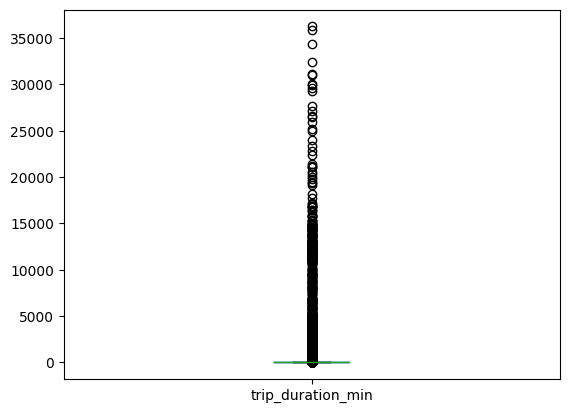

In [32]:
# Building boxplot for trip duration
data.boxplot(column =['trip_duration_min'], grid = False)
plt.show()

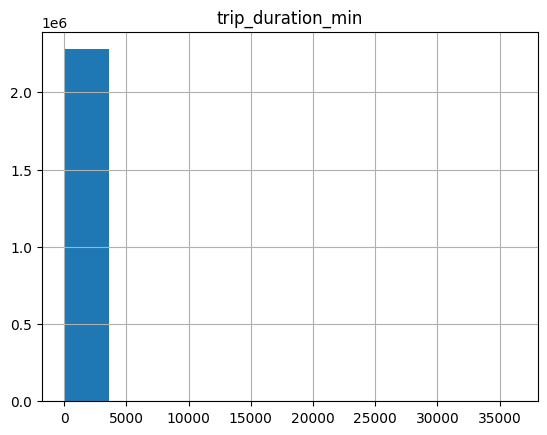

In [33]:
# Building histogram for trip duration
data.hist(column='trip_duration_min')
plt.show()

In [34]:
# Calculating 99% percintale
print(data['trip_duration_min'].quantile(q=0.99))

112.43333333333334



The maximum ride duration is approximately 35,000 minutes, which is equal to 24 days. This is obviously a mistake, as DIVVY does not offer monthly rentals, and the maximum ride duration per day with an annual membership is only 45 minutes.

According to DIVVY rules, riders are required to return their bikes to any station and wait for the green light on the dock to ensure it is properly locked. Therefore, we can assume that these outliers are technical issues where either the system did not record the bike return correctly or the customer failed to ensure the dock was locked.

Since the amount of such data is less than 1% and these entries do not provide accurate insights, they have the potential to mislead us in future calculations. Let's proceed with deleting these entries from the dataset.

In [35]:
# Removing outliers from the dataset:
data = data.drop(data[data['trip_duration_min']>112.5].index)
len(data)

2196504

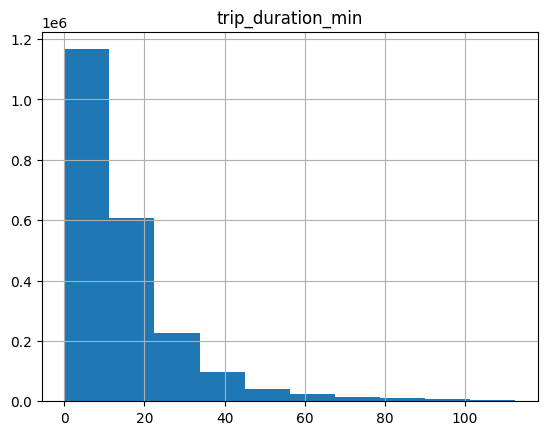

In [36]:
data.hist(column='trip_duration_min')
plt.show()

## 1.3 Merging datasets

Now, we can combine our datasets and add the number of dockers to the trip data. To accomplish this, we will perform a left join operation by merging the tables based on station names.

In [37]:
new_data = pd.merge(data, data_st[['station_name', 'total_docks', 'docks_in_service']],
                    how='left', left_on='start_station_name', right_on='station_name')
new_data = new_data.drop(columns=['station_name'])
new_data.sample(4)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,location_start,location_end,trip_duration_min,total_docks,docks_in_service
1416823,EAE2AACD4CC2624C,electric_bike,2022-05-28 15:31:17,2022-05-28 16:19:25,wells st & evergreen ave,TA1308000049,n clark st & w elm st,NaN,41.906713,-87.635103,41.900000,-87.63000,casual,"41.906713333333336, -87.63510266666667","41.9, -87.63",48.133333,19.0,19.0
2035739,8C9010D6BB88343C,electric_bike,2022-06-08 22:09:28,2022-06-08 22:21:13,sheffield ave & webster ave,TA1309000033,n clark st & w elm st,NaN,41.921685,-87.653768,41.900000,-87.63000,member,"41.921685333333336, -87.6537685","41.9, -87.63",11.750000,19.0,19.0
1354484,661CF21FB4FBE10D,classic_bike,2022-05-15 09:31:57,2022-05-15 09:36:55,western ave & walton st,KA1504000103,damen ave & chicago ave,13132,41.898418,-87.686596,41.895769,-87.67722,member,"41.89841768945, -87.6865960164","41.895769, -87.67722",4.966667,23.0,23.0
1178166,B14BC284955F9ED1,electric_bike,2022-05-24 08:21:07,2022-05-24 08:34:08,elston ave & cortland st,TA1305000039,n green st & w lake st,20246.0,41.916456,-87.666815,41.890000,-87.65000,member,"41.91645583333333, -87.666815","41.89, -87.65",13.016667,23.0,23.0


In [38]:
new_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216170 entries, 0 to 2216169
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ride_id             2216170 non-null  object        
 1   rideable_type       2216170 non-null  object        
 2   started_at          2216170 non-null  datetime64[ns]
 3   ended_at            2216170 non-null  datetime64[ns]
 4   start_station_name  2038752 non-null  object        
 5   start_station_id    1887056 non-null  object        
 6   end_station_name    2022928 non-null  object        
 7   end_station_id      1864921 non-null  object        
 8   start_lat           2216170 non-null  float64       
 9   start_lng           2216170 non-null  float64       
 10  end_lat             2216043 non-null  float64       
 11  end_lng             2216043 non-null  float64       
 12  member_casual       2216170 non-null  object        
 13  location_sta

In [49]:
missing_list = new_data[new_data['total_docks'].isnull() & new_data['start_station_name'].notnull()]
missing_list['start_station_name'].nunique()

28

We have 28 stations that didn't find their match in the list of stations.

In [48]:
data_st[data_st['station_name'].str.contains('austin ave & wellington ave', na=False)]

,id,station_name,total_docks,docks_in_service,status,lat,lng,location
443,1674190170827532584,austin ave & wellington ave,1,1,In Service,41.935245,-87.776052,"41.9352453, -87.776052"


In [53]:
new_data['start_station_name'] = new_data['start_station_name'].str.title()
new_data['end_station_name'] = new_data['end_station_name'].str.title()
new_data = new_data.drop(['location_start', 'location_end'], axis=1)
new_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration_min,total_docks,docks_in_service
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2.950000,15.0,15.0
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,4.350000,15.0,15.0
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,4.350000,27.0,27.0
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,14.933333,15.0,15.0
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,6.033333,23.0,23.0


Now our data is ready for export and future analysis!

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# Import data to Google Drive
new_data.to_csv('/content/drive/MyDrive/data/2022-H1-clean.csv')

## Summery of Data Preprocessing part


In the preprocessing part of the project, we focused on cleaning and standardizing the data for further analysis.

We began standardizing station names in both of our data sources:  we identified inconsistencies in the station names and implemented steps to standardize them. We removed "(Temp)" from the end, "Public Rack - " from the beginning, and asterisks "*" from the end of station names. These adjustments resulted in a consistent format for all station names in the dataset.

Moving on to the trip data, we combined the six tables into one dataframe, ensuring data consolidation and simplifying the preprocessing process.

We encountered missing values in certain columns, such as start_station_name, start_station_id, end_station_name, and end_station_id. To address this, we utilized the available latitude and longitude values to restore the missing station names. By creating a dictionary with geographical locations as keys, we successfully restored a significant number of missing values.

Additionally, we fixed data formats by converting the 'started_at' and 'ended_at' columns to appropriate date and time formats.

Further analysis revealed some discrepancies in the dataset, such as trips with end times earlier than start times. These entries were considered misleading and were removed from the dataset to ensure data integrity.

We also identified outliers in ride durations exceeding 24 days, which is inconsistent with DIVVY's rental policies. These outliers were likely caused by technical issues or user errors. Due to their limited quantity and potential to mislead future calculations, we decided to delete these entries from the dataset.

Finally, we merged the datasets and added the number of dockers to the trip data through a left join operation based on station names.

In conclusion, the preprocessing steps undertaken in this part have effectively cleaned and standardized the data, ensuring its quality and integrity for further analysis. The data is now ready for exploring patterns, deriving insights, and conducting meaningful analyses related to DIVVY bike trips.